In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

from imblearn.over_sampling import SMOTE
df = pd.read_csv("credit_card_fraud_dataset.csv")

df.head()

,Transaction_ID,Customer_ID,Transaction_Amount,Transaction_Time,Merchant_Category,Location,Card_Limit,Current_Balance,Payment_Due_Date,Payment_Date,Num_Transactions_Last_24hrs,Is_International,Fraud_Label
0,1,1102,318.46,2025-09-28 18:50:00,Groceries,Kolkata,50000,46781.46,2025-10-28,2025-10-29,7,0,0
1,2,1214,11.97,2025-03-29 23:16:00,Electronics,Chennai,100000,72133.80,2025-04-28,2025-04-26,3,0,0
2,3,1769,256.03,2025-10-21 06:25:00,Fuel,Kolkata,50000,10909.50,2025-11-20,2025-11-21,1,0,0
3,4,1021,1.42,2025-12-11 07:54:00,Food,Chennai,150000,110133.52,2026-01-10,2026-01-06,3,0,0
4,5,1243,179.50,2025-05-11 10:46:00,Fuel,Chennai,75000,15347.17,2025-06-10,2025-06-09,2,1,0


In [2]:
print(df.info())
print(df.isnull().sum())
# Convert datetime columns
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'])
df['Payment_Due_Date'] = pd.to_datetime(df['Payment_Due_Date'])
df['Payment_Date'] = pd.to_datetime(df['Payment_Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               5000 non-null   int64  
 1   Customer_ID                  5000 non-null   int64  
 2   Transaction_Amount           5000 non-null   float64
 3   Transaction_Time             5000 non-null   object 
 4   Merchant_Category            5000 non-null   object 
 5   Location                     5000 non-null   object 
 6   Card_Limit                   5000 non-null   int64  
 7   Current_Balance              5000 non-null   float64
 8   Payment_Due_Date             5000 non-null   object 
 9   Payment_Date                 5000 non-null   object 
 10  Num_Transactions_Last_24hrs  5000 non-null   int64  
 11  Is_International             5000 non-null   int64  
 12  Fraud_Label                  5000 non-null   int64  
dtypes: float64(2), int

In [5]:
df['On_Time_Payment'] = (df['Payment_Date'] <= df['Payment_Due_Date']).astype(int)

In [6]:
df['Exceeded_Limit'] = (df['Current_Balance'] > df['Card_Limit']).astype(int)


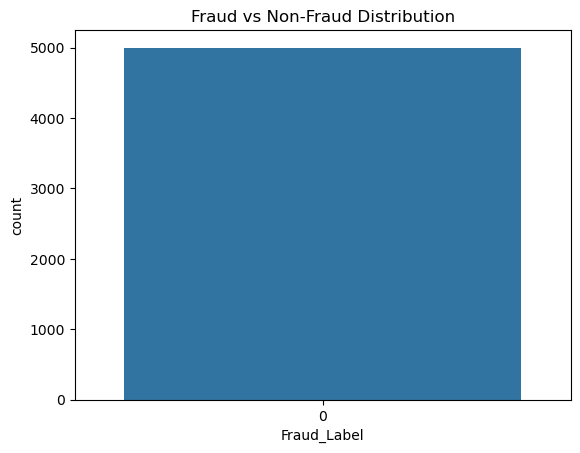

In [7]:
sns.countplot(x='Fraud_Label', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


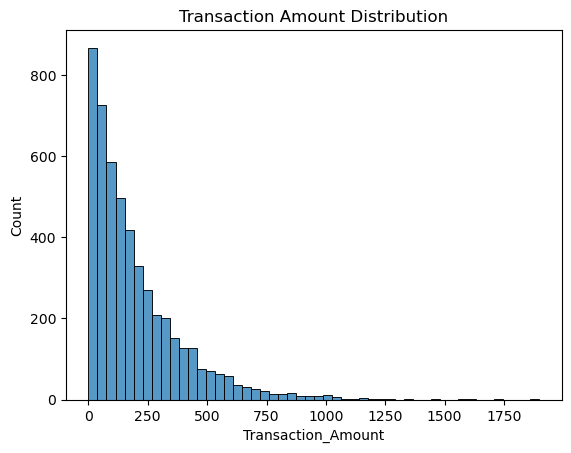

In [8]:
sns.histplot(df['Transaction_Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


In [9]:
le = LabelEncoder()
df['Merchant_Category'] = le.fit_transform(df['Merchant_Category'])
df['Location'] = le.fit_transform(df['Location'])

In [10]:
X = df.drop(['Fraud_Label', 'Transaction_ID', 
             'Transaction_Time', 'Payment_Due_Date', 
             'Payment_Date'], axis=1)

y = df['Fraud_Label']


In [12]:
fraud_probability = 0.08  

fraud_label = np.random.choice([0,1], p=[1-fraud_probability, fraud_probability])


In [13]:
df.loc[df.sample(frac=0.08).index, 'Fraud_Label'] = 1

print(df['Fraud_Label'].value_counts())


Fraud_Label
0    4600
1     400
Name: count, dtype: int64


In [14]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=42
)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [28]:
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1126  277]
 [ 115 1242]]


In [30]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8176431863067808
Recall: 0.9152542372881356


In [31]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Question 1: Fraud cases detected correctly
tp = cm[1][1]

# Question 3: Recall of fraud class
recall = recall_score(y_test, y_pred_rf)

# Question 7: Precision of fraud class
precision = precision_score(y_test, y_pred_rf)

# Question 2: Users paying on time
on_time = df['On_Time_Payment'].sum()

# Question 4: Users exceeded card limit
exceeded = df['Exceeded_Limit'].sum()

# Question 5: Percentage of fraud transactions
fraud_percentage = (df['Fraud_Label'].sum() / len(df)) * 100

# Question 6: Fraud-to-normal ratio
fraud = df['Fraud_Label'].sum()
normal = len(df) - fraud
ratio = f"{fraud}:{normal}"

# Question 8: Total transactions
total_transactions = len(df)

# Question 9: Dominant class
dominant_class = "Fraud" if fraud > normal else "Non-Fraud"

# Question 10: Highest transaction value
highest_transaction = df['Transaction_Amount'].max()


In [32]:
# import tkinter as tk

# root = tk.Tk()
# root.title("Credit Card Fraud Detection Dashboard")
# root.geometry("900x600")
# root.configure(bg="#1e1e1e")

# title = tk.Label(
#     root,
#     text="CREDIT CARD FRAUD DETECTION RESULTS",
#     font=("Helvetica", 18, "bold"),
#     fg="cyan",
#     bg="#1e1e1e"
# )
# title.pack(pady=20)

# results_text = f"""
# 1. Fraud cases detected correctly: {tp}
# 2. Users paying on time: {on_time}
# 3. Recall of fraud class: {recall:.4f}
# 4. Users exceeded card limit: {exceeded}
# 5. Fraud Percentage: {fraud_percentage:.2f}%
# 6. Fraud to Normal Ratio: {ratio}
# 7. Precision of fraud class: {precision:.4f}
# 8. Total transactions: {total_transactions}
# 9. Dominant class: {dominant_class}
# 10. Highest transaction value: {highest_transaction}
# """

# results_label = tk.Label(
#     root,
#     text=results_text,
#     font=("Helvetica", 12),
#     fg="white",
#     bg="#1e1e1e",
#     justify="left"
# )

# results_label.pack(pady=20)

# root.mainloop()


In [33]:
import tkinter as tk
from tkinter import ttk

# Create main window
root = tk.Tk()
root.title("Credit Card Fraud Detection Dashboard")
root.geometry("1000x650")
root.configure(bg="#121212")

# =======================
# TITLE SECTION
# =======================
title = tk.Label(
    root,
    text="CREDIT CARD FRAUD DETECTION ANALYTICS",
    font=("Segoe UI", 20, "bold"),
    fg="#00FFFF",
    bg="#121212"
)
title.pack(pady=20)

subtitle = tk.Label(
    root,
    text="Model: Random Forest | Imbalanced Dataset handled using SMOTE",
    font=("Segoe UI", 11),
    fg="white",
    bg="#121212"
)
subtitle.pack()

# =======================
# MAIN FRAME
# =======================
main_frame = tk.Frame(root, bg="#121212")
main_frame.pack(pady=30)

# Function to create result cards
def create_card(parent, text, row, col):
    card = tk.Frame(parent, bg="#1E1E1E", width=280, height=100)
    card.grid(row=row, column=col, padx=15, pady=15)
    card.grid_propagate(False)

    label = tk.Label(
        card,
        text=text,
        font=("Segoe UI", 11),
        fg="white",
        bg="#1E1E1E",
        justify="left"
    )
    label.pack(expand=True)

# =======================
# RESULT CARDS
# =======================

create_card(main_frame, f"Fraud Detected Correctly:\n{tp}", 0, 0)
create_card(main_frame, f"Users Paying On Time:\n{on_time}", 0, 1)
create_card(main_frame, f"Recall (Fraud Class):\n{recall:.4f}", 0, 2)

create_card(main_frame, f"Exceeded Card Limit:\n{exceeded}", 1, 0)
create_card(main_frame, f"Fraud Percentage:\n{fraud_percentage:.2f}%", 1, 1)
create_card(main_frame, f"Fraud : Normal Ratio:\n{ratio}", 1, 2)

create_card(main_frame, f"Precision (Fraud Class):\n{precision:.4f}", 2, 0)
create_card(main_frame, f"Total Transactions:\n{total_transactions}", 2, 1)
create_card(main_frame, f"Dominant Class:\n{dominant_class}", 2, 2)

create_card(main_frame, f"Highest Transaction:\n₹ {highest_transaction}", 3, 1)

# =======================
# FOOTER
# =======================
footer = tk.Label(
    root,
    text="Developed by Annaya Singh | ML Minor Project",
    font=("Segoe UI", 9),
    fg="gray",
    bg="#121212"
)
footer.pack(side="bottom", pady=10)

root.mainloop()